# Banklending 

## Task

Objective :This is a binary classification where you need predict custusmer will default

In [1]:
#loading_all libraries
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,recall_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
from sklearn import metrics
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import csv

In [2]:
#to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the train and test data-set using pandas.read_table



In [3]:
df_train=pd.read_table('C:/Users/hitech services/Downloads/Python Project - Bank Lending-20190227T152546Z-001/Python Project - Bank Lending/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

In [4]:
#to display the entire dataframe 
pd.set_option("display.max.columns", None)

In [5]:
df_train.shape

(855969, 73)

# Data Description:
Train.csv : 855969 x 73 [including headers] 

In [92]:
#to view top 5 rows of dataframe
df_train.head(n=5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [93]:
#to known about the dataframe of featurs
df_train.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
default_ind           int64
Length: 73, dtype: object

In [94]:
#function to find missing Value
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(20))

In [95]:
#missing_data function on dataset
missing_data(df_train)

,Total,Percent
dti_joint,855529,0.999486
verification_status_joint,855527,0.999484
annual_inc_joint,855527,0.999484
il_util,844360,0.986438
mths_since_rcnt_il,843035,0.984890
total_bal_il,842681,0.984476
inq_last_12m,842681,0.984476
open_acc_6m,842681,0.984476
open_il_6m,842681,0.984476
open_il_24m,842681,0.984476


In [96]:
#removing top 26 feature with most missing value
df_train_new=df_train.drop(['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il',
'total_bal_il','inq_last_12m','open_acc_6m','open_il_6m','open_il_24m','open_il_12m',
'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','desc','mths_since_last_record',
'mths_since_last_major_derog','mths_since_last_delinq','next_pymnt_d','tot_cur_bal',
'tot_coll_amt','total_rev_hi_lim','emp_title'],axis=1)

In [97]:
#imputing the missing value with mean value in revol_util featture
df_train_new['revol_util'].fillna(df_train_new['revol_util'].mean(),inplace=True)

In [98]:
missing_data(df_train_new)

,Total,Percent
emp_length,43061,0.050307
last_pymnt_d,8862,0.010353
collections_12_mths_ex_med,56,0.000065
last_credit_pull_d,50,0.000058
title,33,0.000039
default_ind,0,0.000000
addr_state,0,0.000000
zip_code,0,0.000000
purpose,0,0.000000
pymnt_plan,0,0.000000


In [99]:
#feature enginearing on last_credit_pull_d feature
df_train_new['last_credit_pull_d'] = pd.to_datetime(df_train_new['last_credit_pull_d'])
df_train_new['Month'] = df_train_new['last_credit_pull_d'].apply(lambda x: x.month)
df_train_new['Year'] = df_train_new['last_credit_pull_d'].apply(lambda x: x.year)
df_train_new = df_train_new.drop(['last_credit_pull_d'], axis = 1)

In [100]:
#imputing missing value with mode value 
df_train_new['Month'].fillna(df_train_new.mode()['Month'][0],inplace=True)
df_train_new['Year'].fillna(df_train_new.mode()['Year'][0],inplace=True)

In [101]:
df_train_new.shape

(855969, 48)

In [102]:
print(df_train_new['title'].value_counts())

Debt consolidation                    398089
Credit card refinancing               159228
Home improvement                       38633
Other                                  30522
Debt Consolidation                     15469
                                       ...  
Business Loan for Buying Equipment         1
long term saving                           1
jaskel                                     1
ourmovehome                                1
BILLPAY LOAN                               1
Name: title, Length: 60991, dtype: int64


In [103]:
#to impute missing na value with debt_consolidation because its is most repeted value
df_train_new['title'].fillna('Debt consolidation ',inplace=True)

In [104]:
df_train_new.dtypes

id                                     int64
member_id                              int64
loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                  object
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                            object
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
pymnt_plan                            object
purpose                               object
title                                 object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                          float64
earliest_c

In [105]:
#removing/droping the unwanted features 
df_train_new = df_train_new.drop(['id'],axis=1)

df_train_new = df_train_new.drop(['member_id'],axis=1)

df_train_new = df_train_new.drop(['earliest_cr_line'],axis=1)

df_train_new = df_train_new.drop(['zip_code'],axis=1)

df_train_new = df_train_new.drop(['last_pymnt_d'],axis=1)

df_train_new = df_train_new.drop(['policy_code'],axis=1)

In [106]:
df_train_new.head(n=5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,default_ind,Month,Year
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,Computer,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,bike,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,INDIVIDUAL,0.0,1,9.0,2013.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,small_business,real estate business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,other,personel,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,INDIVIDUAL,0.0,0,1.0,2015.0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,INDIVIDUAL,0.0,0,1.0,2016.0


In [107]:
#replace the categorial to numeric 
df_train_new=df_train_new.replace(to_replace='10+ years',value=10)
df_train_new=df_train_new.replace(to_replace='1 year',value=1)
df_train_new=df_train_new.replace(to_replace='2 years',value=2)
df_train_new=df_train_new.replace(to_replace='3 years',value=3)
df_train_new=df_train_new.replace(to_replace='4 years',value=4)
df_train_new=df_train_new.replace(to_replace='5 years',value=5)
df_train_new=df_train_new.replace(to_replace='6 years',value=6)
df_train_new=df_train_new.replace(to_replace='7 years',value=7)
df_train_new=df_train_new.replace(to_replace='8 years',value=8)
df_train_new=df_train_new.replace(to_replace='9 years',value=9)
df_train_new=df_train_new.replace(to_replace='< 1 year',value=0.5)

In [108]:
df_train_new['title'].value_counts()

Debt consolidation                    398089
Credit card refinancing               159228
Home improvement                       38633
Other                                  30522
Debt Consolidation                     15469
                                       ...  
Business Loan for Buying Equipment         1
long term saving                           1
jaskel                                     1
ourmovehome                                1
Purchasing a hot tub                       1
Name: title, Length: 60991, dtype: int64

In [109]:
counts = df_train_new['title'].value_counts()

df_train_new = df_train_new[~df_train_new['title'].isin(counts[counts < 100].index)]

In [110]:
df_train_new.head(n=5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,36 months,12.69,402.54,B,B5,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,36 months,13.49,305.38,C,C1,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,36 months,10.65,325.74,B,B2,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [111]:
#to remove all na values throughout the dataset
df_train_new = df_train_new.dropna(axis = 0, how ='any') 

In [112]:
df_train_new['emp_length'].value_counts()

10.0    250108
2.0      66111
0.5      58937
3.0      58682
1.0      48017
5.0      45547
4.0      43776
8.0      37603
7.0      37273
6.0      34888
9.0      29598
Name: emp_length, dtype: int64

In [26]:
#dataset for data visulization in tabelau
df_train_bin=df_train_new
df_train_new.to_csv('Bank Lending.csv')

##  Correlation Matrix
When two sets of data are strongly linked together we say they have a High Correlation.

The word Correlation is made of Co- (meaning "together"), and Relation

Correlation is Positive when the values increase together, and
Correlation is Negative when one value decreases as the other increases
A correlation is assumed to be linear (following a line).

correlation examples
Correlation can have a value:

1 is a perfect positive correlation
0 is no correlation (the values don't seem linked at all)
-1 is a perfect negative correlation
The value shows how good the correlation is (not how steep the line is), and if it is positive or negative.

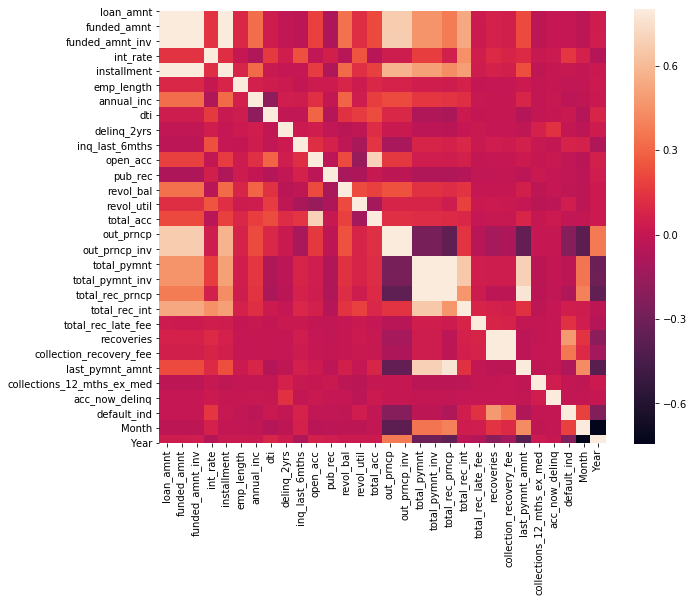

In [113]:
#correlation matrix
corrmat = df_train_new.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

# Data Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization

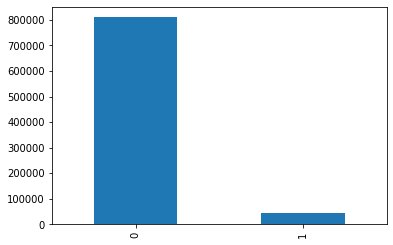

In [26]:
df_train['default_ind'].value_counts().plot.bar()

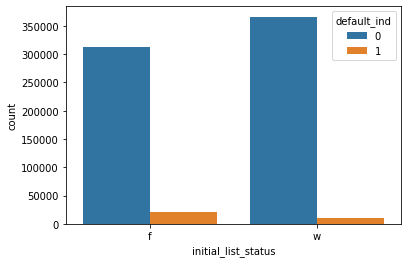

In [27]:
sns.countplot('initial_list_status',data=df_train_new,hue='default_ind')

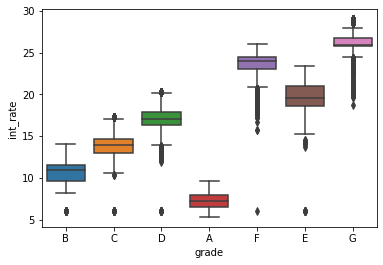

In [28]:
sns.boxplot('grade','int_rate',data=df_train_new)

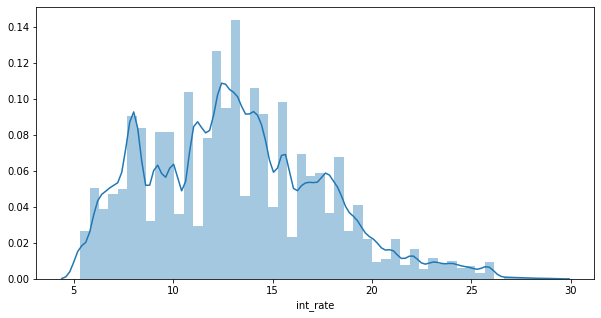

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(df_train_new['int_rate'])
plt.show()

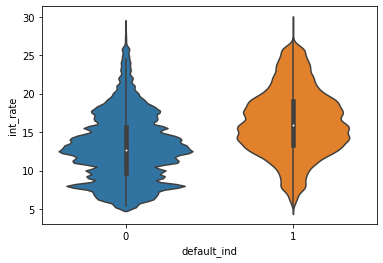

In [33]:
sns.violinplot('default_ind','int_rate',data=df_train_new,bw='scott')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F837CF7C8>,
      dtype=object)

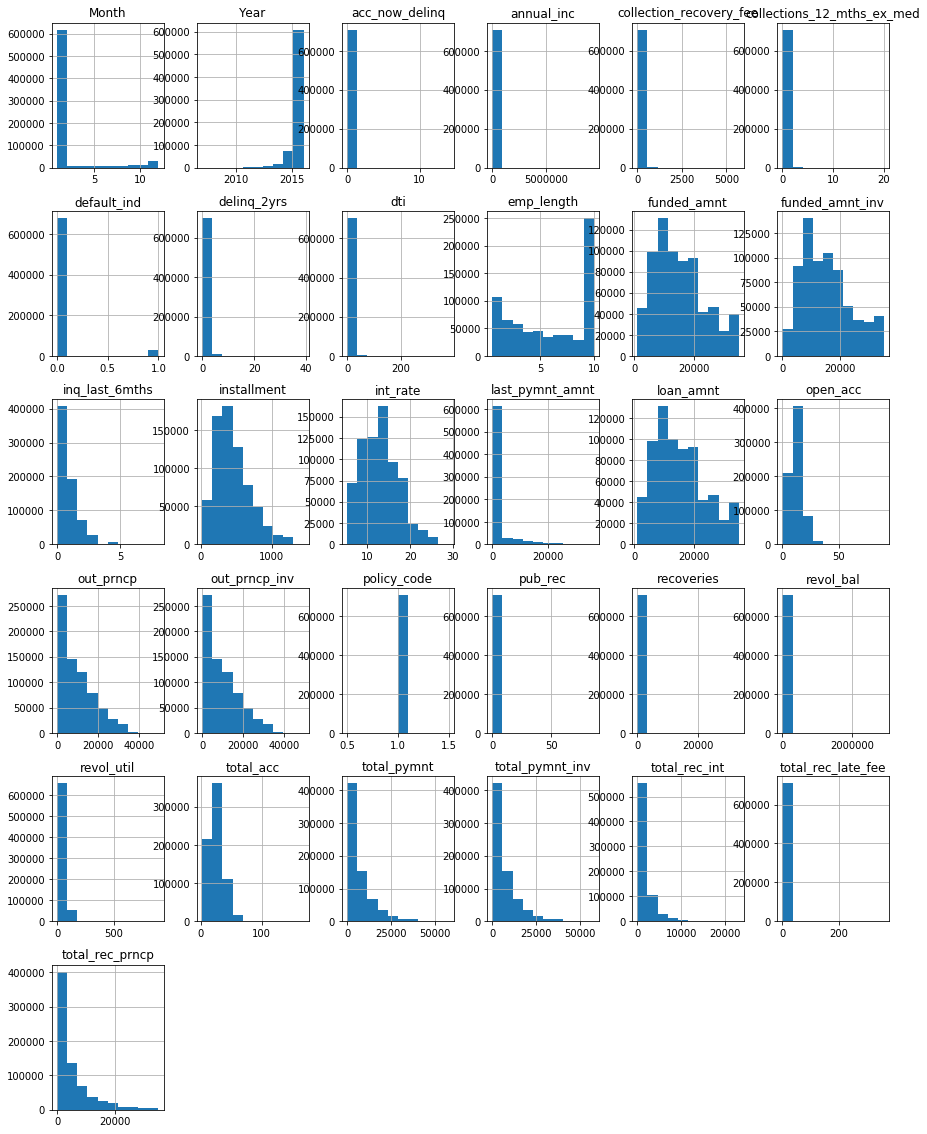

In [35]:
#plotting histogram of all features
df_train_new.hist(figsize=(15,20))

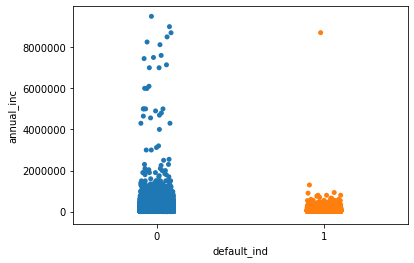

In [30]:
sns.stripplot('default_ind','annual_inc',data=df_train_new,jitter=True)

Text(0.5, 1, 'boxplot')

<Figure size 1080x720 with 0 Axes>

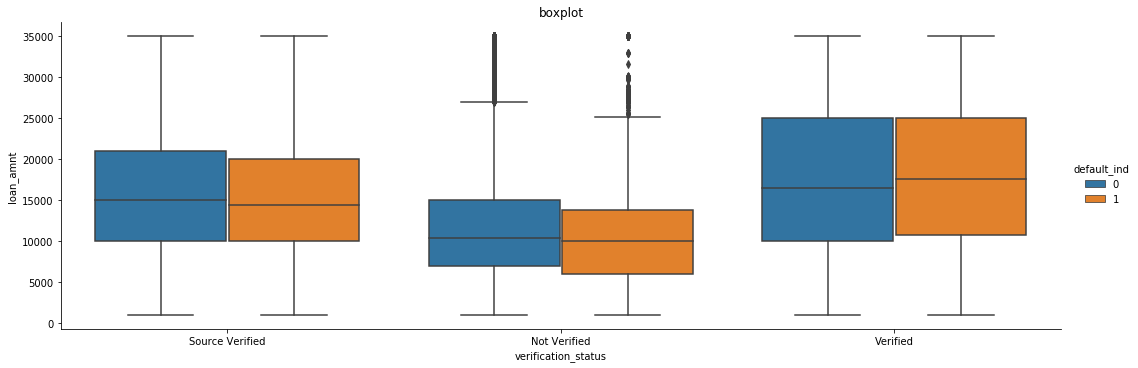

In [31]:
plt.figure(figsize=(15,10))
sns.catplot(x='verification_status',y='loan_amnt',data=df_train_new,hue='default_ind',height=5,aspect=3,kind='box')
plt.title('boxplot')

<Figure size 1080x720 with 0 Axes>

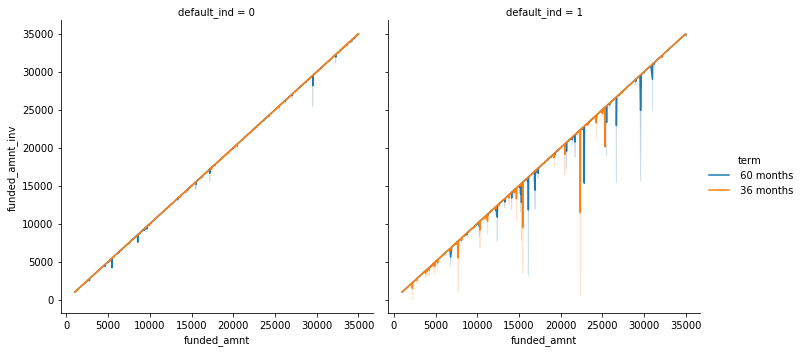

In [28]:
plt.figure(figsize=(15,10))
sns.relplot(x='funded_amnt', y='funded_amnt_inv', data=df_train_new,
            kind='line', hue='term', col='default_ind')

Text(0.5, 1.0, 'Total committed by Investors')

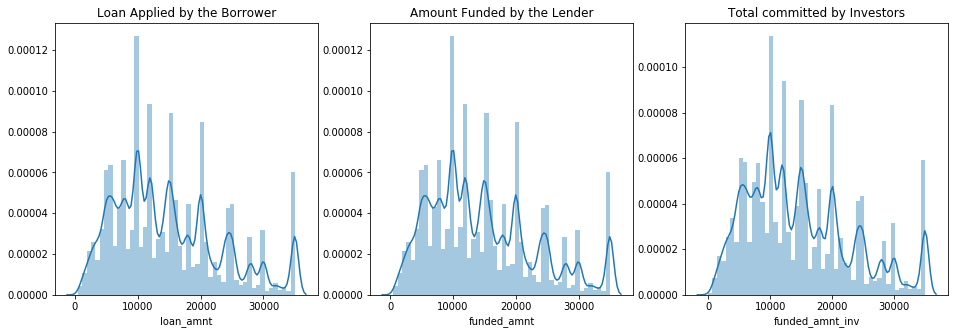

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(df_train['loan_amnt'], ax=ax[0])
sns.distplot(df_train['funded_amnt'], ax=ax[1])
sns.distplot(df_train['funded_amnt_inv'], ax=ax[2])

ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")

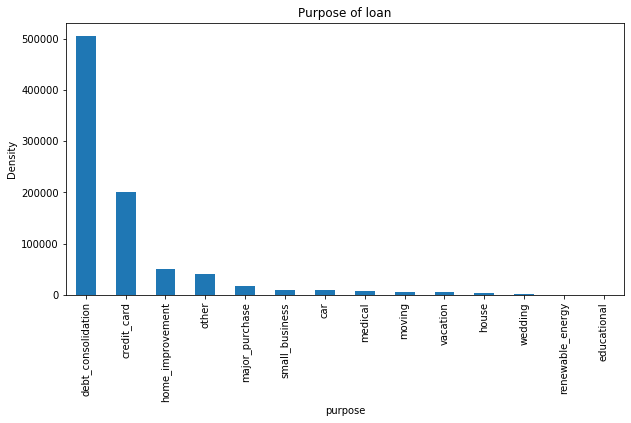

In [26]:
df_train.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

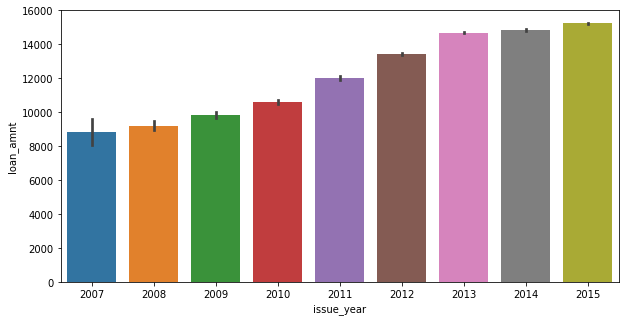

In [28]:
plt.figure(figsize=(10,5))
df_train['issue_year'] = df_train['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=df_train)

Text(0.5, 1.0, 'Yearwise Distribution of defaulter')

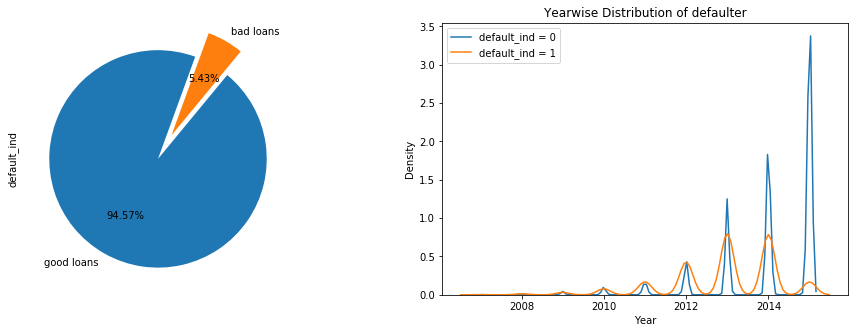

In [29]:
# Loan Status 
fig, ax = plt.subplots(1, 2, figsize=(16,5))
df_train['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(df_train.loc[df_train['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(df_train.loc[df_train['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

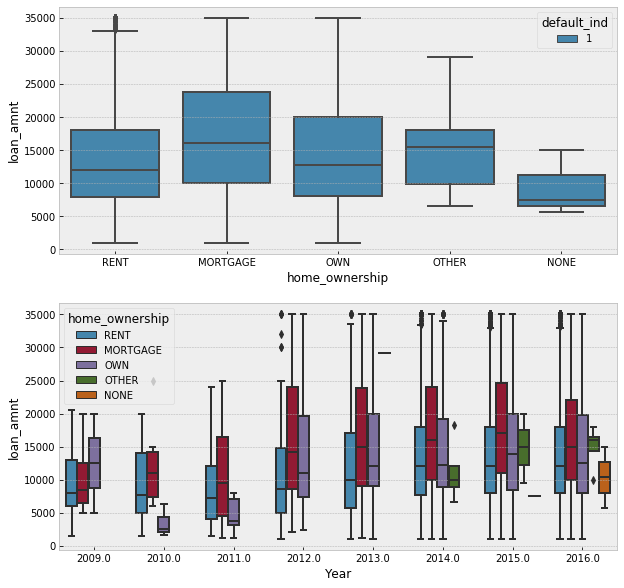

In [42]:
defaulter = df_train_new.loc[df_train_new['default_ind']==1]
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(data=defaulter,x = 'home_ownership',y='loan_amnt',hue='default_ind')
plt.subplot(212)
sns.boxplot(data=defaulter,x='Year',y='loan_amnt',hue='home_ownership')

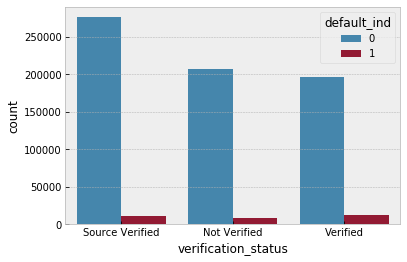

In [44]:
sns.countplot('verification_status',data=df_train_new,hue='default_ind')

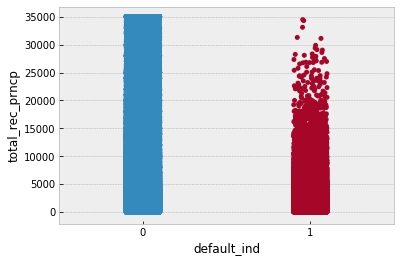

In [45]:
sns.stripplot('default_ind','total_rec_prncp',data=df_train_new,jitter=True)

<Figure size 1800x1440 with 0 Axes>

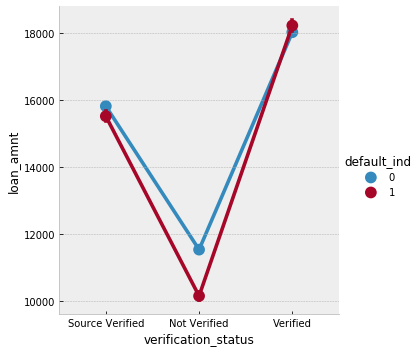

In [53]:
plt.figure(figsize=(25,20))
sns.factorplot(data=df_train_new,x='verification_status',y='loan_amnt',hue='default_ind')

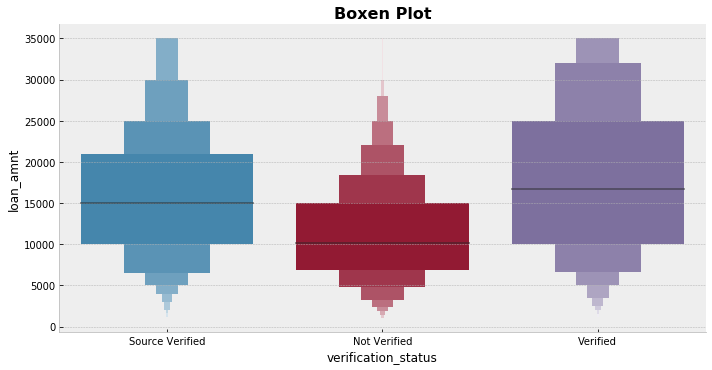

In [57]:
# Plotting
sns.catplot(x='verification_status', y='loan_amnt', data=df_train_new, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

In [34]:
df_train_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'default_ind', 'Month', 'Year'],
      dtype='object')

In [26]:
df_train_new.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,default_ind,Month,Year
count,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,7.105400e+05,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,7.105400e+05,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.000000,710540.0,710540.000000,710540.000000,710540.000000,710540.000000
mean,15154.385045,15147.697842,15132.395293,13.136743,445.509745,6.089900,7.715871e+04,18.321889,0.328889,0.662651,11.766103,0.202079,1.734502e+04,55.184378,25.579955,9329.923356,9326.215595,6991.203318,6978.362335,5304.434230,1648.092134,0.256885,38.420069,4.203375,2117.851548,0.015888,1.0,0.005378,0.043543,1.969094,2015.806015
std,8481.591222,8478.142086,8477.063916,4.371068,244.701091,3.606113,6.687517e+04,8.312838,0.885929,0.951531,5.395200,0.597962,2.301796e+04,23.575545,11.895520,8568.154615,8564.660767,7542.659617,7527.792809,6424.826603,1955.115258,3.248616,376.959111,53.987148,4841.620224,0.141535,0.0,0.080605,0.204076,2.711099,0.556573
min,1000.000000,1000.000000,0.000000,5.320000,20.220000,0.500000,3.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,2007.000000
25%,8625.000000,8600.000000,8575.000000,9.990000,267.790000,3.000000,4.790400e+04,12.090000,0.000000,0.000000,8.000000,0.000000,6.628000e+03,37.900000,17.000000,1171.800000,1171.550000,1766.152500,1762.527500,1109.210000,420.500000,0.000000,0.000000,0.000000,288.070000,0.000000,1.0,0.000000,0.000000,1.000000,2016.000000
50%,14000.000000,14000.000000,13950.000000,12.990000,390.830000,6.000000,6.500000e+04,17.810000,0.000000,0.000000,11.000000,0.000000,1.214800e+04,55.900000,24.000000,7837.955000,7834.870000,4364.660000,4358.100000,2836.010000,1010.140000,0.000000,0.000000,0.000000,463.640000,0.000000,1.0,0.000000,0.000000,1.000000,2016.000000
75%,20000.000000,20000.000000,20000.000000,15.800000,583.040000,10.000000,9.200000e+04,24.150000,0.000000,1.000000,15.000000,0.000000,2.129900e+04,73.400000,32.000000,14639.680000,14636.430000,9534.035000,9521.565000,6946.130000,2111.645000,0.000000,0.000000,0.000000,790.740000,0.000000,1.0,0.000000,0.000000,1.000000,2016.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,10.000000,9.500000e+06,380.530000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.000000,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,23171.650000,358.680000,33520.270000,5694.093600,36475.590000,20.000000,1.0,14.000000,1.000000,12.000000,2016.000000


## Label Encoding 

In [26]:
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['term'])
list(le1.classes_)
df_train_new['term'] = le1.transform(df_train_new['term'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,B,B5,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,C,C1,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,B,B2,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [27]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['grade'])
list(le1.classes_)
df_train_new['grade'] = le1.transform(df_train_new['grade'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,B5,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,C1,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,B2,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [28]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['sub_grade'])
list(le1.classes_)
df_train_new['sub_grade'] = le1.transform(df_train_new['sub_grade'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [29]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['home_ownership'])
list(le1.classes_)
df_train_new['home_ownership'] = le1.transform(df_train_new['home_ownership'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [30]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['verification_status'])
list(le1.classes_)
df_train_new['verification_status'] = le1.transform(df_train_new['verification_status'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [31]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['purpose'])
list(le1.classes_)
df_train_new['purpose'] = le1.transform(df_train_new['purpose'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,n,9,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,n,2,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,n,2,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,n,2,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,n,9,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [32]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['addr_state'])
list(le1.classes_)
df_train_new['addr_state'] = le1.transform(df_train_new['addr_state'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,n,9,Personal,37,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,n,2,Loan,27,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,n,2,Consolidation,4,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,n,2,freedom,45,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,n,9,Other Loan,4,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [33]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['application_type'])
list(le1.classes_)
df_train_new['application_type'] = le1.transform(df_train_new['application_type'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,n,9,Personal,37,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,n,2,Loan,27,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,n,2,Consolidation,4,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,n,2,freedom,45,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,n,9,Other Loan,4,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [34]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['pymnt_plan'])
list(le1.classes_)
df_train_new['pymnt_plan'] = le1.transform(df_train_new['pymnt_plan'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,0,9,Personal,37,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,0,2,Loan,27,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,0,2,Consolidation,4,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,0,2,freedom,45,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,0,9,Other Loan,4,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [35]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_train_new['initial_list_status'])
list(le1.classes_)
df_train_new['initial_list_status'] = le1.transform(df_train_new['initial_list_status'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,1.0,5,80000.0,1,2011-12-01,0,9,Personal,37,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,2,14,8.0,5,47004.0,0,2011-12-01,0,2,Loan,27,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,0,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,1,9,10.0,4,75000.0,1,2011-12-01,0,2,Consolidation,4,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,0,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,2,10,0.5,5,30000.0,1,2011-12-01,0,2,freedom,45,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,0,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,1,6,3.0,5,100000.0,1,2011-12-01,0,9,Other Loan,4,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,0,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [36]:
df_train_new.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                   int32
int_rate                             float64
installment                          float64
grade                                  int32
sub_grade                              int32
emp_length                           float64
home_ownership                         int32
annual_inc                           float64
verification_status                    int32
issue_d                       datetime64[ns]
pymnt_plan                             int32
purpose                                int32
title                                 object
addr_state                             int32
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal 

# Train And Test Split 

In [37]:
train = df_train_new[df_train_new['issue_d'] < '2015-6-01']
test = df_train_new[df_train_new['issue_d'] >= '2015-6-01']

In [156]:
x_train=train.drop(['default_ind','title','issue_d'],axis=1)
y_train=train['default_ind']
x_test=test.drop(['default_ind','title','issue_d'],axis=1)
y_test=test['default_ind']

# LogisticRegression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"),

In [157]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.9969221377695531


# confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_prediction)

array([[437835,     20],
       [  1422,  29230]], dtype=int64)

# AUC 
Compute Area Under the Curve (AUC) using the trapezoidal rule

In [66]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.9767812851003845


# average precision recall score


In [67]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


# recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [68]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_train, log_prediction))

recall_score on train set : 0.9536082474226805


 # F1 Score
Compute the F1 score, also known as balanced F-score or F-measure

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [69]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_train, log_prediction))

F1_sccore on train set : 0.9759273480017362


## Classification report

In [70]:
print(classification_report(y_train,log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.95      0.98     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [71]:
#model on test using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.9996322815483839


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_prediction)

array([[241715,     31],
       [    58,    229]], dtype=int64)

In [73]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on test using Logistic Regression : 0.8988905869497431


In [74]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.70


In [75]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_test, log_prediction))

recall_score on train set : 0.7979094076655052


In [76]:
from sklearn.metrics import f1_score
print('F1_sccore on train set :',f1_score(y_test, log_prediction))

F1_sccore on train set : 0.8372943327239488


In [77]:
print(classification_report(y_test, log_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    241746
           1       0.88      0.80      0.84       287

    accuracy                           1.00    242033
   macro avg       0.94      0.90      0.92    242033
weighted avg       1.00      1.00      1.00    242033



## Kfold cross validation

In [78]:
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99754541 0.99770549 0.99612598 0.99710782 0.9951548 ]
Mean: 0.9967278999137644
Standard Deviation: 0.0009597190293251257


## ROC Curve

auc_score for Logistic Regression(train):  0.9893882323241919


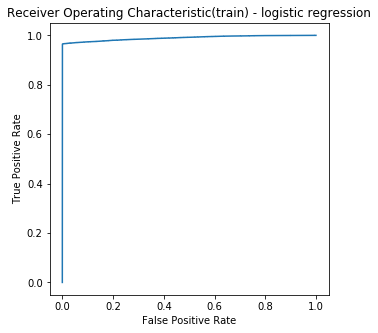

auc_score for Logistic Regression(test):  0.9130293289374389


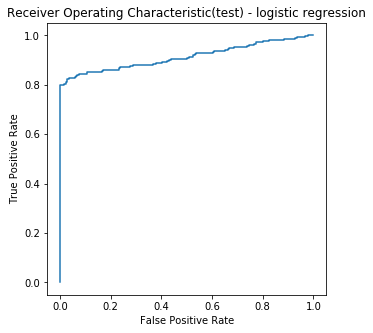

In [82]:
lr_prob=log.predict_proba(x_train)
lr_prob=lr_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, lr_prob)
print('auc_score for Logistic Regression(train): ', roc_auc_score(y_train, lr_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
lr_prob_test=log.predict_proba(x_test)
lr_prob_test=lr_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, lr_prob_test)
print('auc_score for Logistic Regression(test): ', roc_auc_score(y_test, lr_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost Algorithm

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [40]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [41]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.9971996149470552


In [43]:
confusion_matrix(y_train, XGB_prediction)

array([[437839,     16],
       [  1296,  29356]], dtype=int64)

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBoost :",metrics.auc(fpr, tpr))

AUC on train using XGBoost : 0.9788411836329631


In [45]:
average_precision = average_precision_score(y_train, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


In [46]:
print('recall_score on train set :',recall_score(y_train, XGB_prediction))

recall_score on train set : 0.9577189090434556


In [47]:
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))

F1_sccore on train set : 0.9781420765027322


In [48]:
print('classification Report on  train using XGBoost :')
print(classification_report(y_train,XGB_prediction))

classification Report on  train using XGBoost :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.96      0.98     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [49]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.580639830105812


In [50]:
confusion_matrix(y_test, XGB_prediction)

array([[140252, 101494],
       [     5,    282]], dtype=int64)

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBoost :",metrics.auc(fpr, tpr))

AUC on test using XGBoost : 0.7813705236333663


In [52]:
average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.00


In [53]:
print('recall_score on test set :',recall_score(y_test, XGB_prediction))

recall_score on test set : 0.9825783972125436


In [54]:
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))

F1_sccore on test set : 0.005525998647893948


In [55]:
print('classification Report on  test using XGBoost :')
print(classification_report(y_test,XGB_prediction))

classification Report on  test using XGBoost :
              precision    recall  f1-score   support

           0       1.00      0.58      0.73    241746
           1       0.00      0.98      0.01       287

    accuracy                           0.58    242033
   macro avg       0.50      0.78      0.37    242033
weighted avg       1.00      0.58      0.73    242033



## ROC Curve

auc_score for Xgboost: (train):  0.993717139031734


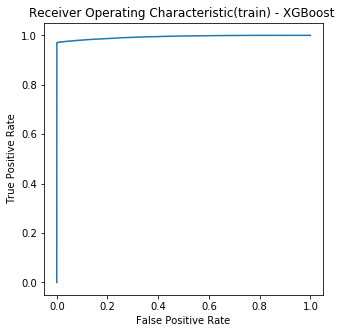

auc_score for Xgboost(test):  0.925360936181152


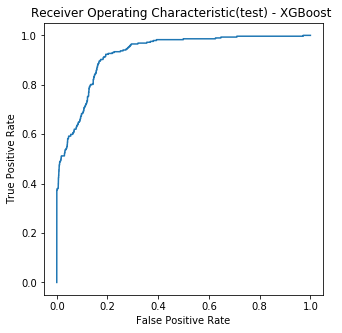

In [56]:
xg_prob=xgboost.predict_proba(x_train)
xg_prob=xg_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, xg_prob)
print('auc_score for Xgboost: (train): ', roc_auc_score(y_train, xg_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - XGBoost ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
xg_prob_test=xgboost.predict_proba(x_test)
xg_prob_test=xg_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, xg_prob_test)
print('auc_score for Xgboost(test): ', roc_auc_score(y_test, xg_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - XGBoost ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance Graph

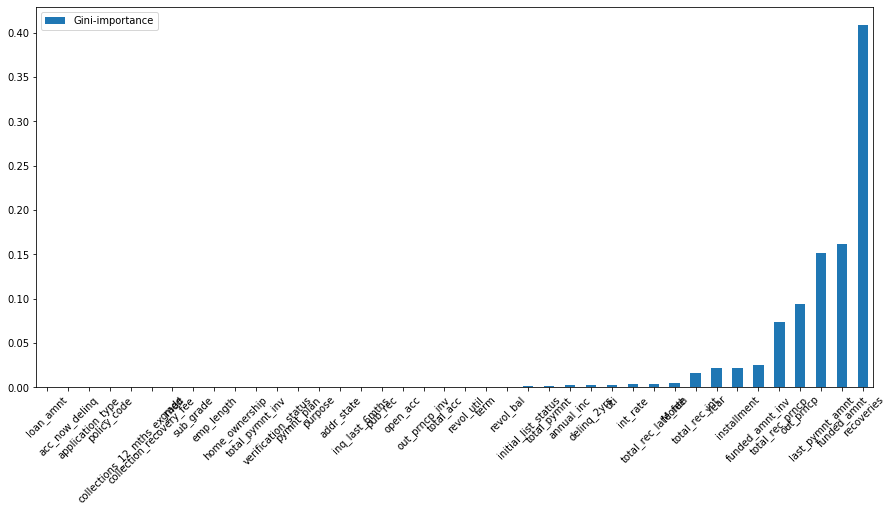

In [139]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, xgboost.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#plt.figure(figsize=(15,7))
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(15,7))

## Kfold Cross Validation

In [69]:
xg = xgb.XGBClassifier()
scores = cross_val_score(xg, x_test, y_test, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99756075 0.99779508 0.9975136  0.997842   0.99774817 0.99704447
 0.99732595 0.99723213 0.9975136  0.99737287]
Mean: 0.9974948624437344
Standard Deviation: 0.00024395437927847552


# RandomForestClassifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set.

In [75]:
rfc2=RandomForestClassifier()
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.9994322390060341


In [77]:
confusion_matrix(y_train, rfc_prediction)

array([[437855,      0],
       [   266,  30386]], dtype=int64)

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

AUC on train using RandomForest : 0.9956609682891817


In [79]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


In [80]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

recall_score on train set : 0.9913219365783635


In [81]:
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))

F1_sccore on train set : 0.995642059045185


In [82]:
print('classification Report on  train using RandomForest :')
print(classification_report(y_train,rfc_prediction))

classification Report on  train using RandomForest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.99      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [95]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.39150033259927364


In [94]:
confusion_matrix(y_test, rfc_prediction)

array([[ 94471, 147275],
       [     2,    285]], dtype=int64)

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

AUC on test using RandomForest : 0.691908777983953


In [86]:
average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.00


In [87]:
print('recall_score on test set :',recall_score(y_test, rfc_prediction))

recall_score on test set : 0.9930313588850174


In [88]:
print('F1_sccore on train set :',f1_score(y_test, rfc_prediction))

F1_sccore on train set : 0.003855336936156973


In [89]:
print('classification Report on  test using RandomForest :')
print(classification_report(y_test,rfc_prediction))

classification Report on  test using RandomForest :
              precision    recall  f1-score   support

           0       1.00      0.39      0.56    241746
           1       0.00      0.99      0.00       287

    accuracy                           0.39    242033
   macro avg       0.50      0.69      0.28    242033
weighted avg       1.00      0.39      0.56    242033



## ROC Curve

auc_score for Random Forest : (train):  0.9999997499838215


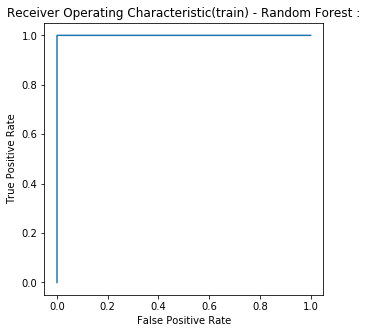

auc_score for Random forest (test):  0.8860930819461472


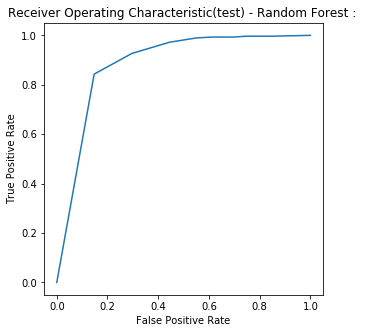

In [91]:
rf_prob=rfc2.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for Random Forest : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - Random Forest :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=rfc2.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for Random forest (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - Random Forest : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance graph

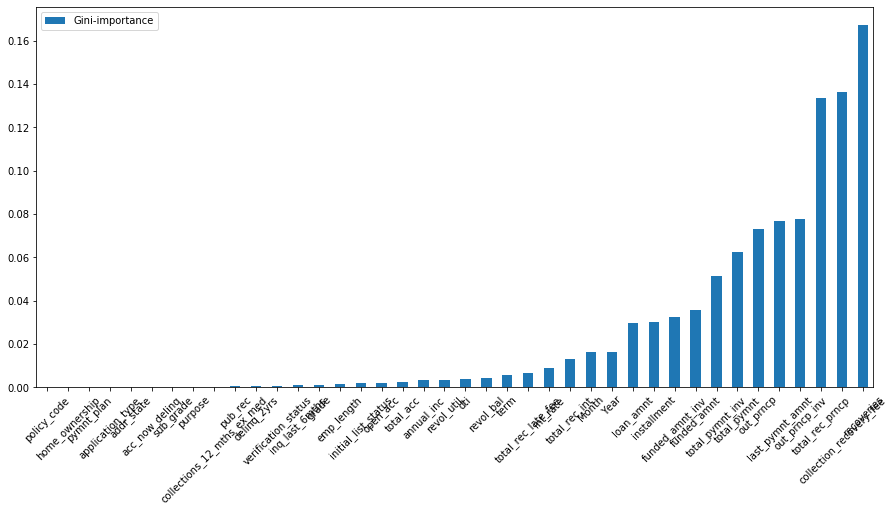

In [154]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfc2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#plt.figure(figsize=(15,7))
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45,figsize=(15,7))

## Kfold Cross Validation

In [99]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99766778 0.99839157 0.9981302  0.99794925 0.99827094 0.9981302
 0.99782862 0.99815031 0.99806985 0.99819048]
Mean: 0.998077920825786
Standard Deviation: 0.00020149347527994313


# Decision Tree CLassifier

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [96]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [97]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [98]:
#model on train using all the independent values in df
dec_prediction = dec.predict(x_train)
dec_score= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score)

Accuracy score on train using Decision Tree : 1.0


In [99]:
    print(confusion_matrix(y_train, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, dec_prediction))
    print('F1_sccore on train set :',f1_score(y_train, dec_prediction))
    print('classification report on train using Decision tree ',classification_report(y_train,dec_prediction))

[[437855      0]
 [     0  30652]]
AUC on train using DecisionTree : 1.0
Average precision-recall score: 1.00
recall_score on train set : 1.0
F1_sccore on train set : 1.0
classification report on train using Decision tree                precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      1.00      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [100]:
#model on test using all the independent values in df
dec_prediction = dec.predict(x_test)
dec_score= accuracy_score(y_test,dec_prediction)
print('Accuracy Score on tree using Decision Tree  :',dec_score)

Accuracy Score on tree using Decision Tree  : 0.3025083356401813


In [102]:
    print(confusion_matrix(y_test, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,dec_prediction)
    print("AUC on test using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_sccore on test set :',f1_score(y_test, dec_prediction))
    print('classification report on test using Decision tree ',classification_report(y_test,dec_prediction))

[[ 72931 168815]
 [     1    286]]
AUC on test using DecisionTree : 0.6491000460038816
Average precision-recall score: 0.00
recall_score on test set : 0.9965156794425087
F1_sccore on test set : 0.0033768625876685475
classification report on test using Decision tree                precision    recall  f1-score   support

           0       1.00      0.30      0.46    241746
           1       0.00      1.00      0.00       287

    accuracy                           0.30    242033
   macro avg       0.50      0.65      0.23    242033
weighted avg       1.00      0.30      0.46    242033



## ROC Curve

auc_score for decision tree : (train):  1.0


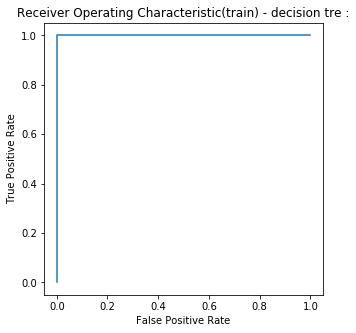

auc_score for decision tree (test):  0.6491000460038816


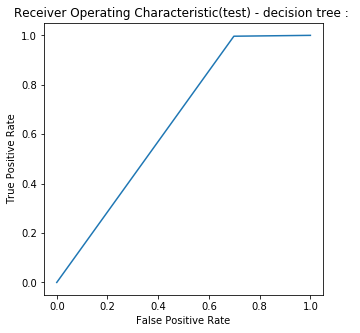

In [103]:
rf_prob=dec.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for decision tree : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - decision tre :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=dec.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for decision tree (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - decision tree : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Kfold Cross Validation

In [104]:
lr = DecisionTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.96787689 0.97753516 0.99201716 0.93852787 0.97075805]
Mean: 0.969343026409428
Standard Deviation: 0.017521148331201972


# ExtraTreeClassifier

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

In [105]:
from sklearn.tree import ExtraTreeClassifier
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [106]:
#model on train using all the independent values in df
etc_prediction = etc.predict(x_train)
etc_score= accuracy_score(y_train,etc_prediction)
print('Accuracy score on train using extratree :',etc_score)

Accuracy score on train using extratree : 1.0


In [108]:
    print(confusion_matrix(y_train, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, etc_prediction))
    print('F1_sccore on train set :',f1_score(y_train, etc_prediction))
    print('classification report on train using Extra tree ',classification_report(y_train,etc_prediction))

[[437855      0]
 [     0  30652]]
AUC on train using ExtraTree : 1.0
Average precision-recall score: 1.00
recall_score on train set : 1.0
F1_sccore on train set : 1.0
classification report on train using Extra tree                precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      1.00      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [109]:
#model on test using all the independent values in df
etc_prediction = etc.predict(x_test)
etc_score= accuracy_score(y_test,etc_prediction)
print('Accuracy score on test using extratree :',etc_score)

Accuracy score on test using extratree : 0.6121107452289564


In [110]:
    print(confusion_matrix(y_test, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_sccore on test set :',f1_score(y_test, etc_prediction))
    print('classification report on test using Extra tree ',classification_report(y_test,etc_prediction))

[[147886  93860]
 [    22    265]]
AUC on train using ExtraTree : 0.767543098407402
Average precision-recall score: 0.00
recall_score on test set : 0.9965156794425087
F1_sccore on test set : 0.00561369317459645
classification report on test using Extra tree                precision    recall  f1-score   support

           0       1.00      0.61      0.76    241746
           1       0.00      0.92      0.01       287

    accuracy                           0.61    242033
   macro avg       0.50      0.77      0.38    242033
weighted avg       1.00      0.61      0.76    242033



## ROC Curve 

auc_score for Extra tree : (train):  1.0


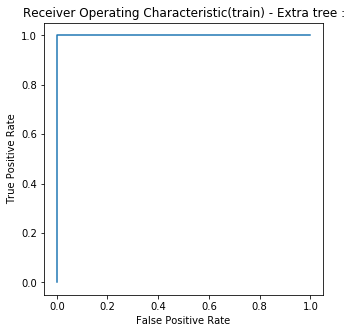

auc_score for Extra Tree (test):  0.767543098407402


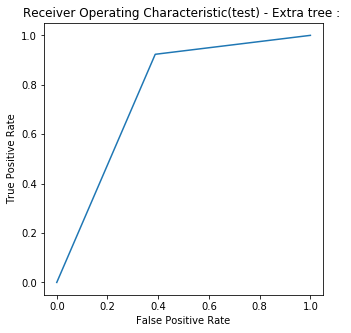

In [111]:
rf_prob=etc.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for Extra tree : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - Extra tree :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=etc.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for Extra Tree (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - Extra tree : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Kfold Cross Validation

In [112]:
lr = ExtraTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95906171 0.97007535 0.96683066 0.9517828  0.98009626]
Mean: 0.9655693554240585
Standard Deviation: 0.009647222967680738


# AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ada =AdaBoostClassifier(n_estimators=100)

In [114]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [115]:
#model on train using all the independent values in df
ada_prediction = ada.predict(x_train)
ada_score= accuracy_score(y_train,ada_prediction)
print('Accuracy score on train using AdaBoost :',ada_score)

Accuracy score on train using AdaBoost : 0.9960555551998156


In [116]:
    print(confusion_matrix(y_train, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,ada_prediction)
    print("AUC on train using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, ada_prediction))
    print('F1_sccore on train set :',f1_score(y_train, ada_prediction))
    print('classification report on train using Extra tree ',classification_report(y_train,ada_prediction))

[[437754    101]
 [  1747  28905]]
AUC on train using AdaBoost : 0.9713873402071571
Average precision-recall score: 0.94
recall_score on train set : 0.9430053503849667
F1_sccore on train set : 0.9690234335713568
classification report on train using Extra tree                precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.94      0.97     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.97      0.98    468507
weighted avg       1.00      1.00      1.00    468507



In [117]:
#model on test using all the independent values in df
ada_prediction = ada.predict(x_test)
ada_score= accuracy_score(y_test,ada_prediction)
print('accuracy score on test using AdaBoost :',ada_score)

accuracy score on test using AdaBoost : 0.8625435374515046


In [118]:
    print(confusion_matrix(y_test, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,ada_prediction)
    print("AUC on test using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, ada_prediction))
    print('F1_sccore on test set :',f1_score(y_test, ada_prediction))
    print('classification report on test using Extra tree ',classification_report(y_test,ada_prediction))

[[208506  33240]
 [    29    258]]
AUC on test using AdaBoost : 0.8807275070378675
Average precision-recall score: 0.01
recall_score on test set : 0.8989547038327527
F1_sccore on test set : 0.015273050170193874
classification report on test using Extra tree                precision    recall  f1-score   support

           0       1.00      0.86      0.93    241746
           1       0.01      0.90      0.02       287

    accuracy                           0.86    242033
   macro avg       0.50      0.88      0.47    242033
weighted avg       1.00      0.86      0.93    242033



## ROC Curve

auc_score for ADAboost : (train):  0.9935507560403556


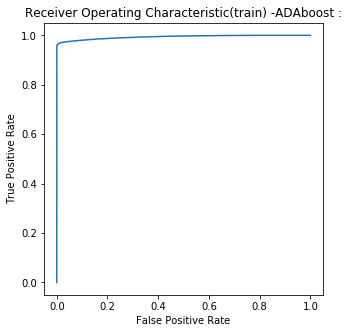

auc_score for ADAboost (test):  0.9517671252901112


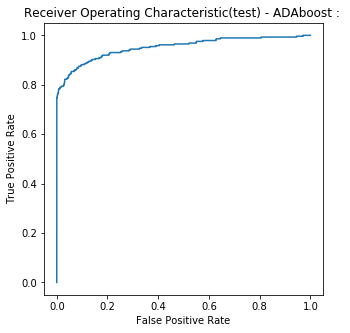

In [119]:
rf_prob=ada.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for ADAboost : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) -ADAboost :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=ada.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for ADAboost (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - ADAboost : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Kfold Cross Validation

In [120]:
lr = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9953683  0.99519754 0.99636076 0.99344724 0.99487732]
Mean: 0.9950502330480223
Standard Deviation: 0.0009423200292035756


<h3 style='padding: 10px'>Comparison Table (LABEL ENCODING)</h2><table border-style:solid; class='table table-striped'> <thead> <tr> <th>Algorithm Used</th> <th>Accuracy Score On Train</th> <th>Accuracy Score On Test</th></tr> </thead> <tbody> <tr> <th scope='row'>XGBoost Classifier </th> <td>0.997</td> <td>0.781</td></tr> 
    <tr> <th scope='row'>Random Forest Classifier</th> <td>0.995</td> <td>0.391</td></tr> <tr> 
    <th scope='row'>Logisitic Regresion</th> <td>0.996</td> <td>0.998
    </td></tr> <tr><th scope='row'>Decision Tree Classifier</th> <td>1.0</td> <td>0.30</td></tr>
    <tr><th scope='row'>Extra tree classifier</th><td>1.0</td><td>0.612</td></tr>
    <tr><th scope='row'>ADA boost classifier</th><td>0.996</td><td>0.862</td></tr>
    </tbody> </table>

# Binary Encoding

In [27]:
df_train_bin=df_train_new

In [28]:
from sklearn.preprocessing import LabelBinarizer
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['term'])
list(le1.classes_)
df_train_new['term'] = le1.transform(df_train_new['term'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,B,B5,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,C,C1,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,B,B2,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [29]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['grade'])
list(le1.classes_)
df_train_new['grade'] = le1.transform(df_train_new['grade'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,B5,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,C1,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,B2,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [30]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['sub_grade'])
list(le1.classes_)
df_train_new['sub_grade'] = le1.transform(df_train_new['sub_grade'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,RENT,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,RENT,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,OWN,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,RENT,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,RENT,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [31]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['home_ownership'])
list(le1.classes_)
df_train_new['home_ownership'] = le1.transform(df_train_new['home_ownership'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,Source Verified,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,Not Verified,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,Source Verified,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,Source Verified,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,Source Verified,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [32]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['verification_status'])
list(le1.classes_)
df_train_new['verification_status'] = le1.transform(df_train_new['verification_status'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,n,debt_consolidation,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,n,debt_consolidation,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,n,debt_consolidation,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,n,other,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [33]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['purpose'])
list(le1.classes_)
df_train_new['purpose'] = le1.transform(df_train_new['purpose'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,n,0,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,n,0,Loan,NC,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,n,0,Consolidation,CA,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,n,0,freedom,VA,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,n,0,Other Loan,CA,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [34]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['addr_state'])
list(le1.classes_)
df_train_new['addr_state'] = le1.transform(df_train_new['addr_state'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,n,0,Personal,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,n,0,Loan,0,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,INDIVIDUAL,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,n,0,Consolidation,0,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,INDIVIDUAL,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,n,0,freedom,0,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,INDIVIDUAL,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,n,0,Other Loan,0,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,INDIVIDUAL,0.0,1,3.0,2014.0


In [35]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['application_type'])
list(le1.classes_)
df_train_new['application_type'] = le1.transform(df_train_new['application_type'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,n,0,Personal,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,n,0,Loan,0,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,n,0,Consolidation,0,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,n,0,freedom,0,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,n,0,Other Loan,0,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [36]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['pymnt_plan'])
list(le1.classes_)
df_train_new['pymnt_plan'] = le1.transform(df_train_new['pymnt_plan'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,0,0,Personal,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,0,0,Loan,0,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,0,0,Consolidation,0,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,f,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,0,0,freedom,0,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,f,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,0,0,Other Loan,0,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,f,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [37]:
le1 = preprocessing.LabelBinarizer()
le1.fit(df_train_new['initial_list_status'])
list(le1.classes_)
df_train_new['initial_list_status'] = le1.transform(df_train_new['initial_list_status'])
df_train_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,default_ind,Month,Year
4,3000.0,3000.0,3000.0,1,12.69,67.79,0,0,1.0,0,80000.0,0,2011-12-01,0,0,Personal,0,17.94,0.0,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,0.0,0.0000,67.79,0.0,1.0,0,0.0,0,1.0,2016.0
6,7000.0,7000.0,7000.0,1,15.96,170.08,0,0,8.0,0,47004.0,1,2011-12-01,0,0,Loan,0,23.51,0.0,1.0,7.0,0.0,17726.0,85.6,11.0,0,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,0.0,0.0000,170.08,0.0,1.0,0,0.0,0,1.0,2016.0
11,12000.0,12000.0,12000.0,0,12.69,402.54,0,0,10.0,0,75000.0,0,2011-12-01,0,0,Consolidation,0,10.78,0.0,0.0,12.0,0.0,23336.0,67.1,34.0,0,0.00,0.00,13943.08,13943.08,12000.00,1943.08,0.0,0.0,0.0000,6315.30,0.0,1.0,0,0.0,0,8.0,2013.0
12,9000.0,9000.0,9000.0,0,13.49,305.38,0,0,0.5,0,30000.0,0,2011-12-01,0,0,freedom,0,10.08,0.0,1.0,4.0,0.0,10452.0,91.7,9.0,0,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,444.3,4.1600,305.38,0.0,1.0,0,0.0,1,11.0,2012.0
14,10000.0,10000.0,10000.0,0,10.65,325.74,0,0,3.0,0,100000.0,0,2011-12-01,0,0,Other Loan,0,7.06,0.0,2.0,14.0,0.0,11997.0,55.5,29.0,0,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,645.1,6.3145,325.74,0.0,1.0,0,0.0,1,3.0,2014.0


In [38]:
df_train_new.dtypes

loan_amnt                            float64
funded_amnt                          float64
funded_amnt_inv                      float64
term                                   int32
int_rate                             float64
installment                          float64
grade                                  int32
sub_grade                              int32
emp_length                           float64
home_ownership                         int32
annual_inc                           float64
verification_status                    int32
issue_d                       datetime64[ns]
pymnt_plan                             int32
purpose                                int32
title                                 object
addr_state                             int32
dti                                  float64
delinq_2yrs                          float64
inq_last_6mths                       float64
open_acc                             float64
pub_rec                              float64
revol_bal 

## Train Test Split 

In [39]:
train = df_train_new[df_train_new['issue_d'] < '2015-6-01']
test = df_train_new[df_train_new['issue_d'] >= '2015-6-01']

In [40]:
del df_train_new['issue_d']

In [41]:
x_train=train.drop(['default_ind','title','issue_d'],axis=1)
y_train=train['default_ind']
x_test=test.drop(['default_ind','title','issue_d'],axis=1)
y_test=test['default_ind']

## Logisitic Regression on Binary encoded Dataset


In [200]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.9968495668154371


In [202]:
print(confusion_matrix(y_train, log_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic regression :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on train set :',recall_score(y_train, log_prediction))
print('F1_sccore on train set :',f1_score(y_train, log_prediction))
print('classification report on train using Logistic regression  ',
      classification_report(y_train,log_prediction))

[[437834     21]
 [  1455  29197]]
AUC on train using Logistic regression : 0.9762418422433067
Average precision-recall score: 0.95
recall_score on train set : 0.9525316455696202
F1_sccore on train set : 0.9753465842659095
classification report on train using Logistic regression                 precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.95      0.98     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [203]:
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.9996281498803882


In [206]:
print(confusion_matrix(y_test, log_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic regression :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_test, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, log_prediction))
print('F1_sccore on test set :',f1_score(y_test, log_prediction))
print('classification report on test using Logistic regression  ',classification_report(y_test,log_prediction))

[[241714     32]
 [    58    229]]
AUC on test using Logistic regression : 0.8988885186631944
Average precision-recall score: 0.70
recall_score on test set : 0.7979094076655052
F1_sccore on test set : 0.8357664233576643
classification report on test using Logistic regression                 precision    recall  f1-score   support

           0       1.00      1.00      1.00    241746
           1       0.88      0.80      0.84       287

    accuracy                           1.00    242033
   macro avg       0.94      0.90      0.92    242033
weighted avg       1.00      1.00      1.00    242033



## ROC Curve

auc_score for Logistic Regression(train):  0.9892933731833069


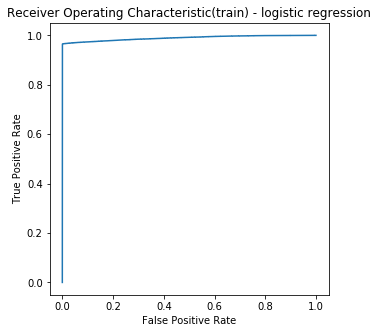

auc_score for Logistic Regression(test):  0.9108653823342269


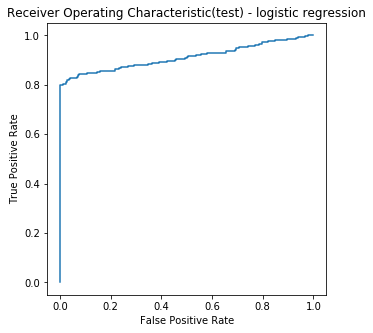

In [207]:
lr_prob=log.predict_proba(x_train)
lr_prob=lr_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, lr_prob)
print('auc_score for Logistic Regression(train): ', roc_auc_score(y_train, lr_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
lr_prob_test=log.predict_proba(x_test)
lr_prob_test=lr_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, lr_prob_test)
print('auc_score for Logistic Regression(test): ', roc_auc_score(y_test, lr_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KFold Cross Validation 

In [208]:
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99697979 0.99782289 0.99589119 0.99710782 0.9951548 ]
Mean: 0.9965912961384141
Standard Deviation: 0.000947439573300348


# XGBoost on Binary Encoded data

In [51]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [52]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.9971953460674013


In [54]:
print(confusion_matrix(y_train, XGB_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBClassifiers:",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_train, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on train set :',recall_score(y_train, XGB_prediction))
print('F1_sccore on train set :',f1_score(y_train, XGB_prediction))
print('classification report on train using XGBoost  ')
print(classification_report(y_train,XGB_prediction))

[[437842     13]
 [  1301  29351]]
AUC on train using XGBClassifiers: 0.9787630486781627
Average precision-recall score: 0.96
recall_score on train set : 0.9575557875505677
F1_sccore on train set : 0.978105838443082
classification report on train using XGBoost  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      0.96      0.98     30652

    accuracy                           1.00    468507
   macro avg       1.00      0.98      0.99    468507
weighted avg       1.00      1.00      1.00    468507



In [55]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.5947660029830643


In [56]:
print(confusion_matrix(y_test, XGB_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBClassifiers:",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, XGB_prediction))
print('F1_sccore on test set :',f1_score(y_test, XGB_prediction))
print('classification report on test using XGBoost  ')
print(classification_report(y_test,XGB_prediction))

[[143671  98075]
 [     5    282]]
AUC on test using XGBClassifiers: 0.7884419953433429
Average precision-recall score: 0.00
recall_score on test set : 0.9825783972125436
F1_sccore on test set : 0.005717529702769555
classification report on test using XGBoost  
              precision    recall  f1-score   support

           0       1.00      0.59      0.75    241746
           1       0.00      0.98      0.01       287

    accuracy                           0.59    242033
   macro avg       0.50      0.79      0.38    242033
weighted avg       1.00      0.59      0.74    242033



## ROC Curve

auc_score for Xgboost: (train):  0.993612326557153


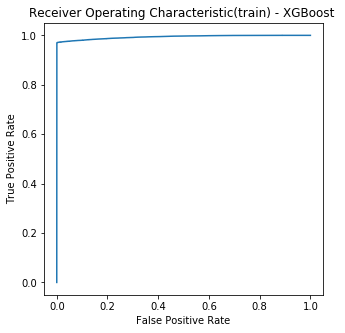

auc_score for Xgboost(test):  0.9285074990593258


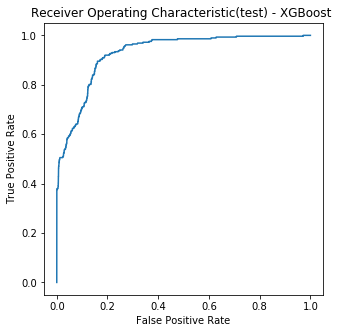

In [215]:
xg_prob=xgboost.predict_proba(x_train)
xg_prob=xg_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, xg_prob)
print('auc_score for Xgboost: (train): ', roc_auc_score(y_train, xg_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - XGBoost ')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
xg_prob_test=xgboost.predict_proba(x_test)
xg_prob_test=xg_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, xg_prob_test)
print('auc_score for Xgboost(test): ', roc_auc_score(y_test, xg_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - XGBoost ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Kfold crossValiddation

In [42]:
xg = xgb.XGBClassifier()
scores = cross_val_score(xg, x_test, y_test, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.91086184 0.9997521  0.99971078 0.9997521  0.9997521 ]
Mean: 0.9819657832674297
Standard Deviation: 0.035551974726304454


# RandomForestclassifier on BinaryEncoded dataset

In [57]:
rfc2=RandomForestClassifier(n_estimators=100)
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.9999957311203461


In [59]:
print(confusion_matrix(y_train, rfc_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on train set :',recall_score(y_train, rfc_prediction))
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))
print('classification Report on  train using RandomForest :')
print(classification_report(y_train,rfc_prediction))

[[437855      0]
 [     2  30650]]
AUC on train using RandomForest : 0.9999673757014225
Average precision-recall score: 1.00
recall_score on train set : 0.9999347514028448
F1_sccore on train set : 0.9999673746370428
classification Report on  train using RandomForest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    437855
           1       1.00      1.00      1.00     30652

    accuracy                           1.00    468507
   macro avg       1.00      1.00      1.00    468507
weighted avg       1.00      1.00      1.00    468507



In [60]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.3586700987055484


In [61]:
print(confusion_matrix(y_test, rfc_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print('recall_score on test set :',recall_score(y_test, rfc_prediction))
print('F1_sccore on test set :',f1_score(y_test, rfc_prediction))
print('classification Report on  test using RandomForest :')
print(classification_report(y_test,rfc_prediction))

[[ 86524 155222]
 [     1    286]]
AUC on test using RandomForest : 0.6772142650602465
Average precision-recall score: 0.00
recall_score on test set : 0.9965156794425087
F1_sccore on test set : 0.003671491382907025
classification Report on  test using RandomForest :
              precision    recall  f1-score   support

           0       1.00      0.36      0.53    241746
           1       0.00      1.00      0.00       287

    accuracy                           0.36    242033
   macro avg       0.50      0.68      0.27    242033
weighted avg       1.00      0.36      0.53    242033



## ROC Curve 

auc_score for Random Forest : (train):  1.0


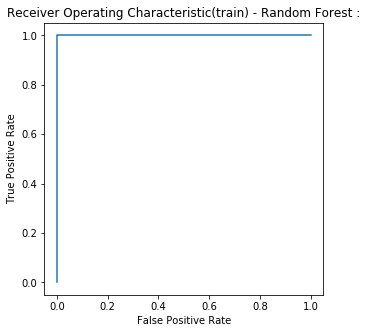

auc_score for Random forest (test):  0.9490634063437043


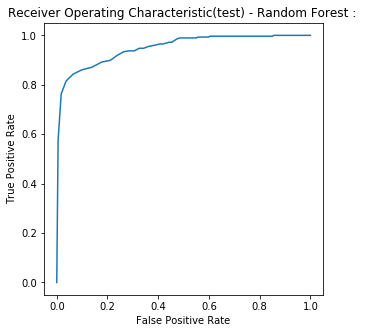

In [48]:
rf_prob=rfc2.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for Random Forest : (train): ', roc_auc_score(y_train, rf_prob))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - Random Forest :')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
rf_prob_test=rfc2.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for Random forest (test): ', roc_auc_score(y_test, rf_prob_test))
# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - Random Forest : ')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## KcrossFold Validation

In [49]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9986233  0.99715054 0.99716118 0.97700131 0.99536825]
Mean: 0.9930609155209951
Standard Deviation: 0.008095825010350565


<h2 style='padding: 10px'>Comparison Table (BINARY ENCODING)</h2><table border-style:solid; class='table table-striped'> <thead> <tr> <th>Algorithm Used</th> <th>Accuracy Score On Train</th> <th>Accuracy Score On Test</th></tr> </thead> <tbody> <tr> <th scope='row'>XGBoost Classifier </th> <td>0.997</td> <td>0.594</td></tr> 
    <tr> <th scope='row'>Random Forest Classifier</th> <td>0.999</td> <td>0.358</td></tr> <tr> 
    <th scope='row'>Logisitic Regresion</th> <td>0.996</td> <td>0.998
    </tbody> </table>

# Conclusion

From all above analyis we can conclude that after binary encoding of dataset and applying logisitic regression model gives best results with accuracy score 0.996 on train and 0.998 on train. 


Hence logistic model can be used for further predicting.